# Data Pre Processing 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.initializers import RandomNormal
from sklearn import preprocessing
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
import seaborn as sns


Using TensorFlow backend.


### Get the Data set

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### **Check the data shape of test and train.**

In [3]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 28, 28)
(60000, 28, 28)
(60000,)
(10000,)


### 28 x 28 vector needs converted into 1 x 748 vector

In [4]:
x_train=x_train.reshape(60000,28*28)
x_test=x_test.reshape(10000,28*28)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Lets visualize the data 

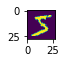

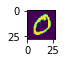

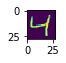

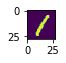

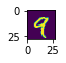

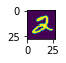

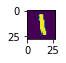

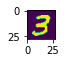

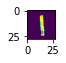

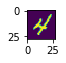

In [5]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[i].reshape(28,28))
  plt.show()
  


### One hot encode the outputs: 
    

*   Actual label: 5
*   Encode lable = [0 0 0 0 0 1 0 0 0 0]



In [6]:
print(y_train[0])


y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)


print(y_train[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
### Norrmalize your Inputs

In [8]:
x_train=preprocessing.normalize(x_train)
x_test=preprocessing.normalize(x_test)

# Building Neural Networks 

#### Simple  softmax Calssifer, Input ---------- 10 dim softmax. 

In [9]:
model = Sequential()
model.add(Dense(input_dim=x_train.shape[1],output_dim=10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history= model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="softmax", units=10)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 14us/step - loss: 1.5840 - acc: 0.7473 - val_loss: 1.0916 - val_acc: 0.8281
Epoch 2/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.8984 - acc: 0.8357 - val_loss: 0.7329 - val_acc: 0.8568
Epoch 3/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.6665 - acc: 0.8592 - val_loss: 0.5823 - val_acc: 0.8766
Epoch 4/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.5552 - acc: 0.8724 - val_loss: 0.5004 - val_acc: 0.8851
Epoch 5/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.4897 - acc: 0.8813 - val_loss: 0.4488 - val_acc: 0.8949
Epoch 6/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.4464 - acc: 0.8878 - val_loss: 0.4132 - val_acc: 0.8988
Epoch 7/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.4156 - acc: 0.8926 - val_loss: 0.3877 - val_acc

## Evaluating The built model 

In [10]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.2889976714491844
Test accuracy: 0.9186


### Dynamic plotting of loss

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty,  colors=['b']):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

<IPython.core.display.Javascript object>


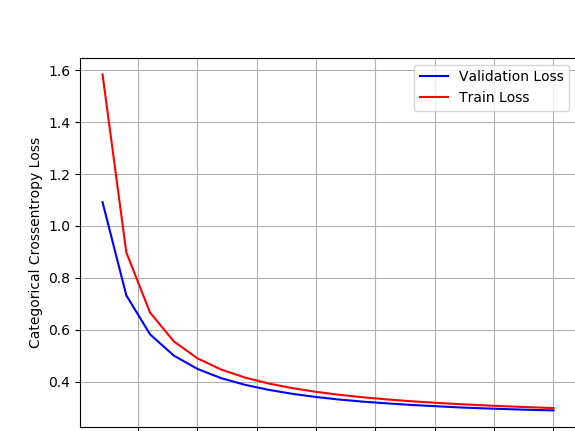

In [12]:
vy = history.history['val_loss']
ty = history.history['loss']


# list of epoch numbers
x = list(range(1,20+1))

plt_dynamic(x, vy, ty)

<IPython.core.display.Javascript object>


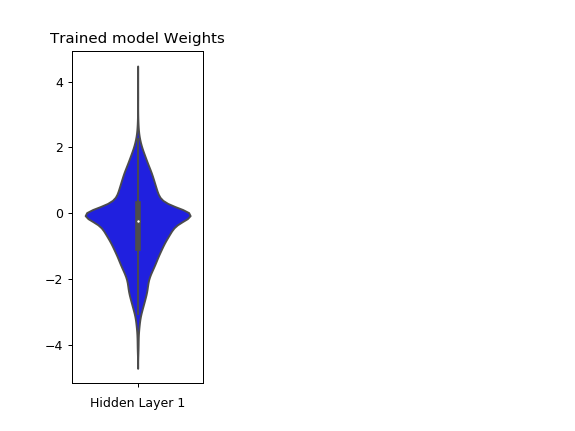

Text(0.5, 0, 'Hidden Layer 1')

In [16]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)




fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')


In [15]:
summary=[]
summary.append(['Simple softmax + sigmoid',history.history['val_loss'][-1],history.history['loss'][-1],score[1]])

### Assignment 

### 2 Hidden Layer + Dropout + BatchNormalization
    -- Relu Activation 
    -- Adam Optimization
    
### Input ------------ 364 -----------52 -------------- 10 dim softmax

In [17]:
model_1=Sequential()

model_1.add(Dense(output_dim=364,input_dim=x_train.shape[1],activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))


model_1.add(Dense(output_dim=52,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim=10,activation='softmax'))

model_1.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", kernel_initializer=<keras.ini..., units=364)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_initializer=<keras.ini..., units=52)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 364)               285740    
_________________________________________________________________
batch_normalization_1 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_1 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 52)                18980     
_________________________________________________________________
batch_normalization_2 (Batch (None, 52)                208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                530       
Total para

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if sys.path[0] == '':


In [18]:
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history_1=model_1.fit(x_train,y_train,batch_size=100 ,epochs=20,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.5747 - acc: 0.8261 - val_loss: 0.1820 - val_acc: 0.9432
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2829 - acc: 0.9178 - val_loss: 0.1345 - val_acc: 0.9588
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.2166 - acc: 0.9380 - val_loss: 0.1072 - val_acc: 0.9678
Epoch 4/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1842 - acc: 0.9477 - val_loss: 0.1006 - val_acc: 0.9700
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1600 - acc: 0.9540 - val_loss: 0.0889 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1469 - acc: 0.9573 - val_loss: 0.0815 - val_acc: 0.9749
Epoch 7/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1339 - acc: 0.9610 - val_loss: 0.0809 - val

In [19]:
score = model_1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.06677404410102172
Test accuracy: 0.9808


<IPython.core.display.Javascript object>


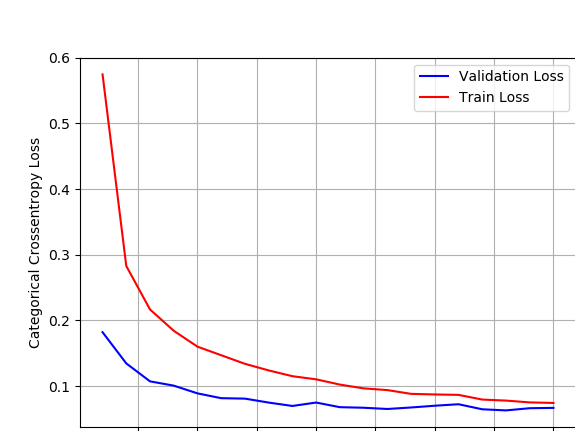

In [20]:
vy = history_1.history['val_loss']
ty = history_1.history['loss']


# list of epoch numbers
x = list(range(1,20+1))

plt_dynamic(x, vy, ty)

<IPython.core.display.Javascript object>


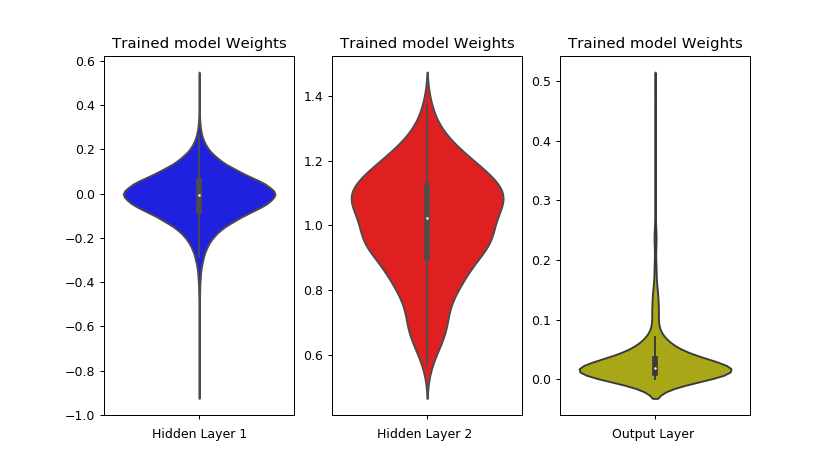

In [46]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [22]:
summary.append(['2 layer + Relu + BN + Drops',history_1.history['val_loss'][-1],history_1.history['loss'][-1],score[1]])

### Prediction 

<IPython.core.display.Javascript object>


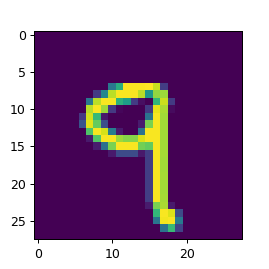

In [45]:
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.imshow(x_train[9752].reshape(28,28))


In [24]:
print("The Predict value is :")
print(model_1.predict(np.array([x_train[9752]])).argmax())

The Predict value is :
9


### 3 Hidden Layer + Dropout + BatchNormalization
    -- Relu Activation 
    -- Adam Optimization
    
### Input ------------ 512 -----------256 --------128------ 10 dim softmax

In [25]:
model_2=Sequential()

model_2.add(Dense(output_dim=512,input_dim=x_train.shape[1],activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))


model_2.add(Dense(output_dim=256,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.095, seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(output_dim=128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(output_dim=10,activation='softmax'))

model_2.summary()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", kernel_initializer=<keras.ini..., units=512)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_initializer=<keras.ini..., units=256)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_initializer=<keras.ini..., units=128)`
  if sys.path[0] == '':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
__________

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  app.launch_new_instance()


In [26]:
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history_2=model_2.fit(x_train,y_train,batch_size=100 ,epochs=20,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.6070 - acc: 0.8124 - val_loss: 0.1799 - val_acc: 0.9442
Epoch 2/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.2730 - acc: 0.9183 - val_loss: 0.1304 - val_acc: 0.9610
Epoch 3/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.2078 - acc: 0.9386 - val_loss: 0.1090 - val_acc: 0.9660
Epoch 4/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.1736 - acc: 0.9484 - val_loss: 0.0919 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.1505 - acc: 0.9545 - val_loss: 0.0799 - val_acc: 0.9749
Epoch 6/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.1342 - acc: 0.9598 - val_loss: 0.0737 - val_acc: 0.9774
Epoch 7/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.1224 - acc: 0.9640 - val_loss: 0.07

In [27]:
score = model_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.05331573344783392
Test accuracy: 0.9851


<IPython.core.display.Javascript object>


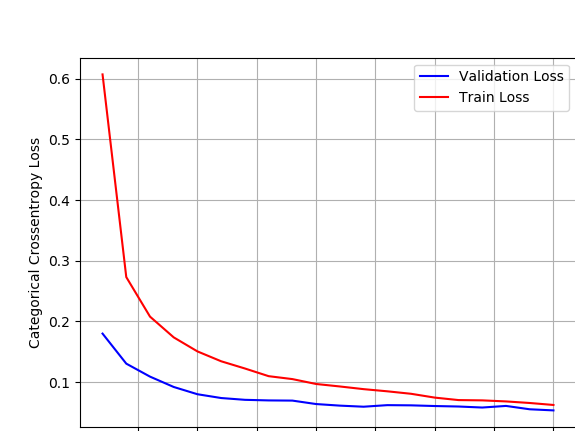

In [28]:
vy = history_2.history['val_loss']
ty = history_2.history['loss']


# list of epoch numbers
x = list(range(1,20+1))

plt_dynamic(x, vy, ty)

<IPython.core.display.Javascript object>


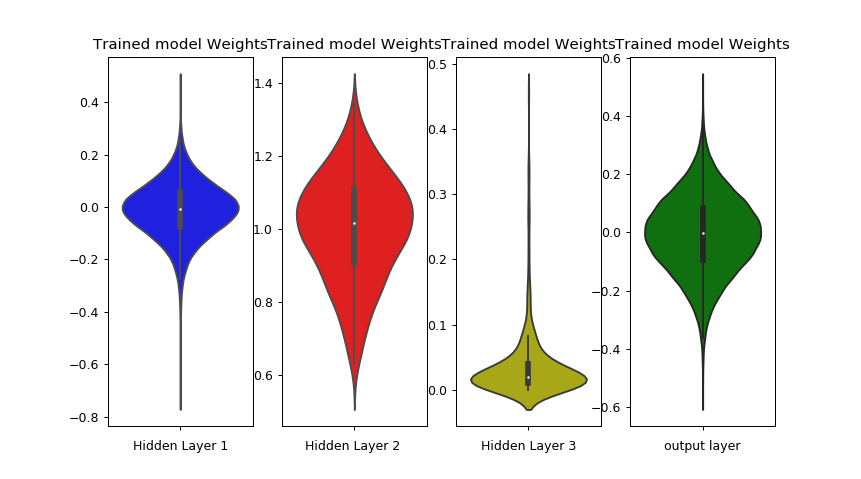

In [44]:
w_after = model_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='g')
plt.xlabel('output layer')

plt.show()


In [31]:
summary.append(['3 layer + Relu + BN + Drops',history_2.history['val_loss'][-1],history_2.history['loss'][-1],score[1]])

### Prediction 

<IPython.core.display.Javascript object>


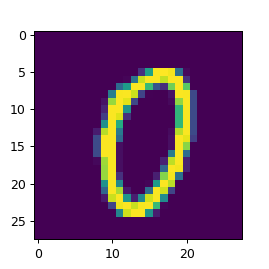

In [32]:
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.imshow(x_train[1000].reshape(28,28))


In [ ]:
print("The Predict value is :")
print(model_2.predict(np.array([x_train[1000]])).argmax())

### 5 Hidden Layer + Dropout + BatchNormalization
    -- Relu Activation 
    -- Adam Optimization
    
### Input ------------ 1024 -----------512 --------256---------128---------64---------- 10 dim softmax

In [33]:
model_3=Sequential()

model_3.add(Dense(output_dim=1024,input_dim=x_train.shape[1],activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))


model_3.add(Dense(output_dim=512,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.095, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))


model_3.add(Dense(output_dim=256,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(output_dim=128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))


model_3.add(Dense(output_dim=64,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))


model_3.add(Dense(output_dim=10,activation='softmax'))

model_3.summary()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", kernel_initializer=<keras.ini..., units=1024)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_initializer=<keras.ini..., units=512)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_initializer=<keras.ini..., units=256)`
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_initializer=<keras.ini..., units=128)`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Updat

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              803840    
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
__________

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


In [34]:
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history_3=model_3.fit(x_train,y_train,batch_size=100 ,epochs=20,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 478us/step - loss: 1.1034 - acc: 0.6565 - val_loss: 0.2350 - val_acc: 0.9314
Epoch 2/20
60000/60000 [==============================] - 29s 488us/step - loss: 0.3840 - acc: 0.8931 - val_loss: 0.1616 - val_acc: 0.9540
Epoch 3/20
60000/60000 [==============================] - 30s 498us/step - loss: 0.2805 - acc: 0.9242 - val_loss: 0.1288 - val_acc: 0.9642
Epoch 4/20
60000/60000 [==============================] - 30s 503us/step - loss: 0.2307 - acc: 0.9391 - val_loss: 0.1104 - val_acc: 0.9699
Epoch 5/20
60000/60000 [==============================] - 27s 447us/step - loss: 0.1976 - acc: 0.9479 - val_loss: 0.0974 - val_acc: 0.9736
Epoch 6/20
60000/60000 [==============================] - 27s 456us/step - loss: 0.1702 - acc: 0.9551 - val_loss: 0.0891 - val_acc: 0.9746
Epoch 7/20
60000/60000 [==============================] - 28s 467us/step - loss: 0.1500 - acc: 0.9605 - val_loss: 0.

In [35]:
score = model_3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.0688722505709622
Test accuracy: 0.9823


<IPython.core.display.Javascript object>


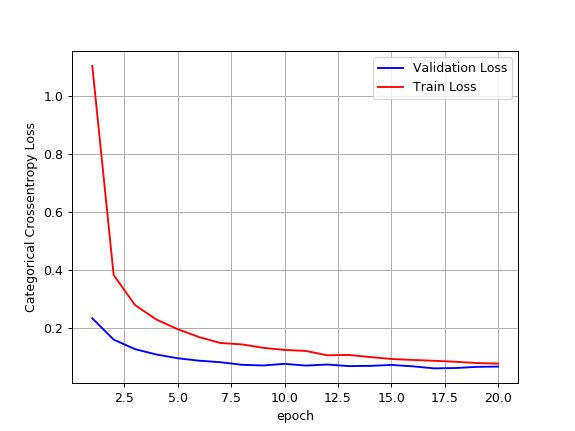

In [36]:
vy = history_3.history['val_loss']
ty = history_3.history['loss']


# list of epoch numbers
x = list(range(1,20+1))

plt_dynamic(x, vy, ty)

<IPython.core.display.Javascript object>


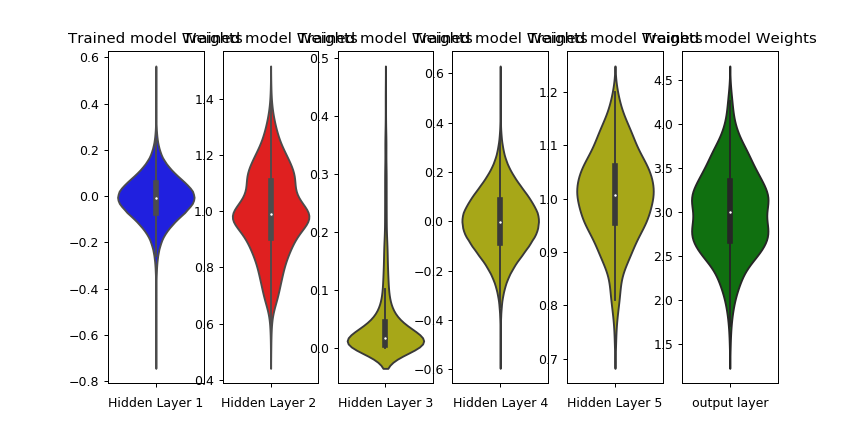

In [37]:
w_after = model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='y')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='g')
plt.xlabel('output layer')

plt.show()


In [38]:
summary.append(['5 layer + Relu + BN + Drops',history_3.history['val_loss'][-1],history_3.history['loss'][-1],score[1]])

### Prediction 

<IPython.core.display.Javascript object>


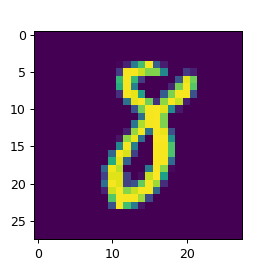

In [39]:
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.imshow(x_train[784].reshape(28,28))


In [40]:
print("The Predict value is :")
print(model_3.predict(np.array([x_train[784]])).argmax())

The Predict value is :
8


## OUTPUT

In [41]:
import pandas as pd
df=pd.DataFrame(summary)
df.columns = ["Model","Test_loss","Train_loss","Test_accuracy"]

### Save model 

In [42]:
model_3.save("model.h5")

In [43]:
df

,Model,Test_loss,Train_loss,Test_accuracy
0,Simple softmax + sigmoid,0.288998,0.297965,0.9186
1,2 layer + Relu + BN + Drops,0.066774,0.074270,0.9808
2,3 layer + Relu + BN + Drops,0.053316,0.062270,0.9851
3,5 layer + Relu + BN + Drops,0.068872,0.079020,0.9823
